# Unsupervised Analysis of Days of Week

Treating crossings each day as features.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

## Get Data

In [2]:
from jupyterworkflow.data import get_fremont_data
data = get_fremont_data()

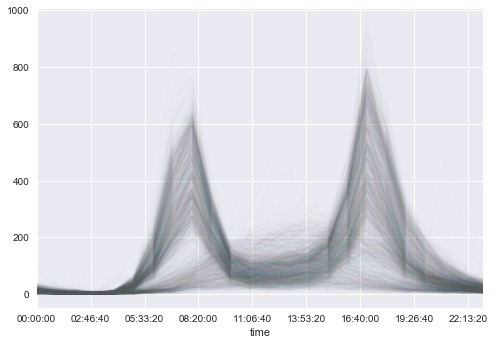

In [3]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.plot(legend=False, alpha=0.01)

## Principal Component Analysis

In [4]:
X = pivoted.fillna(0).T.values
X.shape

(1641, 24)

In [5]:
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(1641, 2)

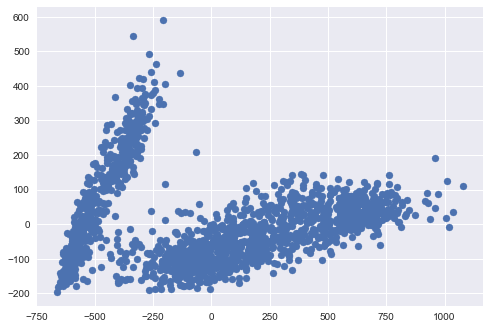

In [6]:
plt.scatter(X2[:,0], X2[:,1])

## Unsupervised Clustering

In [7]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

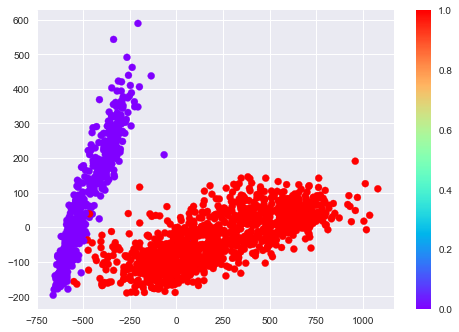

In [8]:
plt.scatter(X2[:,0], X2[:,1], c=labels, cmap='rainbow')
plt.colorbar()

### Week days and Weekends

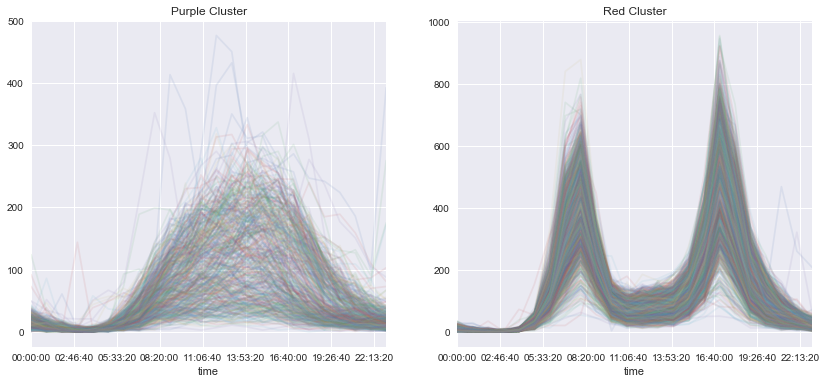

In [9]:
fig, ax = plt.subplots(1,2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title("Purple Cluster")
ax[1].set_title("Red Cluster")

### Comparing with Day of Week

In [10]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

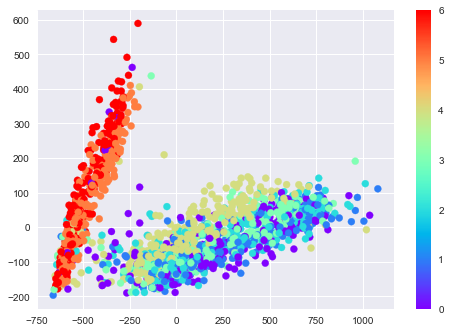

In [11]:
plt.scatter(X2[:,0], X2[:,1], c=dayofweek, cmap='rainbow')
plt.colorbar()

### Analyzing Outliers

The following days are weekdays with a holiday-like pattern  

In [12]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels ==1) & (dayofweek <5)]

DatetimeIndex(['2012-10-03', '2012-10-04', '2012-10-05', '2012-10-08',
               '2012-10-09', '2012-10-10', '2012-10-11', '2012-10-12',
               '2012-10-15', '2012-10-16',
               ...
               '2017-03-20', '2017-03-21', '2017-03-22', '2017-03-23',
               '2017-03-24', '2017-03-27', '2017-03-28', '2017-03-29',
               '2017-03-30', '2017-03-31'],
              dtype='datetime64[ns]', length=1132, freq=None)